### Spectral Clustering

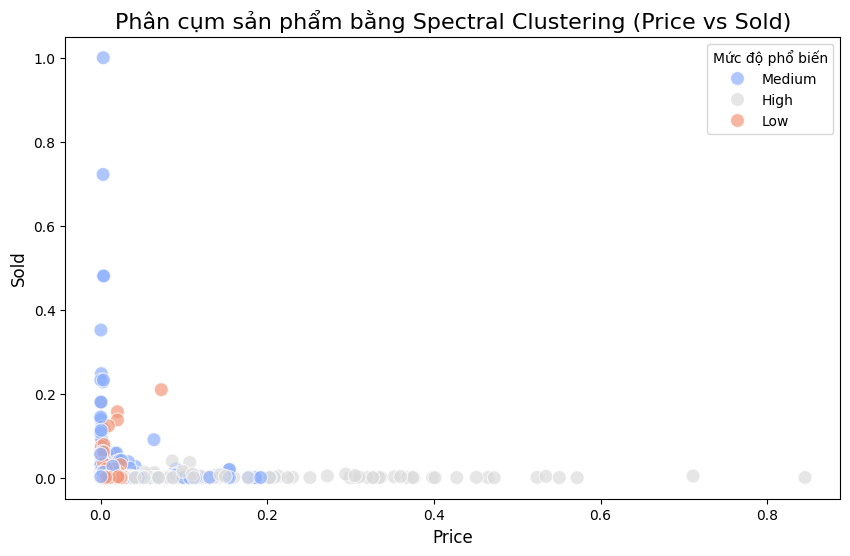

Sản phẩm bán chạy nhất trong từng cụm Spectral Clustering:
                                          product_name     price      sold  \
443  [ SIÊU TRỢ GIÁ ] Tai Nghe Bluetooth Không Dây ...  0.002888  0.229984   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   
946  Máy Lọc Không Khí Gia Đình Diện Tích 50m2 Màng...  0.086092  0.039922   

    popularity  
443        Low  
300     Medium  
946       High  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Bước 1: Tải dữ liệu
train_data = pd.read_csv("../data/processed/train_data.csv")
selected_features = ['rating', 'comment_count', 'price', 'sold']
X = train_data[selected_features]

# Bước 2: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bước 3: Áp dụng Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors', n_neighbors=10)
train_data['spectral_cluster'] = spectral.fit_predict(X_scaled)

# Bước 4: Gán nhãn cụm
cluster_labels = {0: 'Low', 1: 'Medium', 2: 'High'}  # Gán nhãn cụm
train_data['popularity'] = train_data['spectral_cluster'].map(cluster_labels)

# Bước 5: Vẽ biểu đồ phân tán giữa Price và Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='popularity', palette='coolwarm', s=100, alpha=0.7)
plt.title('Phân cụm sản phẩm bằng Spectral Clustering (Price vs Sold)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Mức độ phổ biến')
plt.show()

# Bước 6: Tìm các sản phẩm bán chạy nhất trong từng cụm
top_products = train_data.loc[train_data.groupby('spectral_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm Spectral Clustering:")
print(top_products[['product_name', 'price', 'sold', 'popularity']])
